In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading a file
- Each file here is a shard of hydi_track_10_58_0.trk (split into 10 shards). 72.7-165.3MB in size.
- Block size is 32MB
- 5 repetitions

#### 1 File sequential

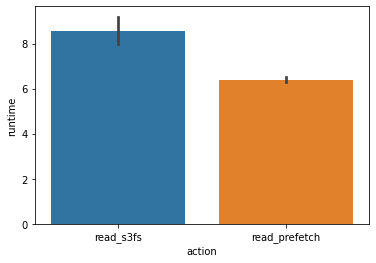

In [2]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_1f_5r_33554432b.out")
df_read = df[df["action"].str.contains("read")]
ax = sns.barplot(x="action", y="runtime", data=df_read)


#### 1 file 16 joblib threads

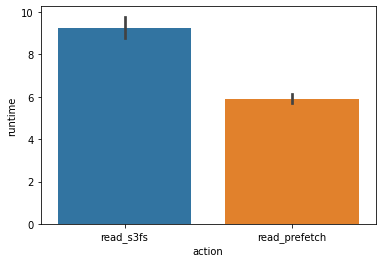

In [3]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_1f_5r_33554432b_16j_seq.out")
df_read = df[df["action"].str.contains("read")]
ax = sns.barplot(x="action", y="runtime", data=df_read)


#### 9 Files sequential

<ipython-input-4-923a2e07790d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read["rep"] = df_read.index.values
<ipython-input-4-923a2e07790d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read["rep"] = df_read["rep"].apply( lambda v:
/home/valeriehayot/Documents/code/ariel_internship/rollingprefetch/.venv/lib64/python3.9/site-packages/pandas/core/indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

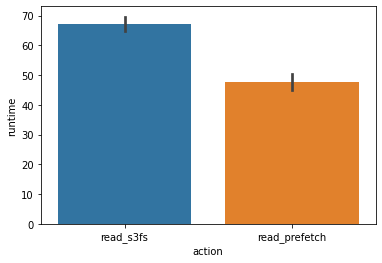

In [4]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_9f_5r_33554432b.out")
df_read = df[df["action"].str.contains("read")]
df_read["rep"] = df_read.index.values

df_read["rep"] = df_read["rep"].apply( lambda v:
    0 if 0 <= v <= 10 
    else 1 if 12 <= v <= 22
    else 2 if 24 <= v <= 34
    else 3 if 36 <= v <= 46
    else 4
) 
df_read.loc[df["action"].str.contains("s3fs"), ["rep","runtime"]] = df_read.loc[df["action"].str.contains("s3fs"), ["rep","runtime"]].groupby("rep").sum()
ax = sns.barplot(x="action", y="runtime", data=df_read)

#### 9 files parallel

<ipython-input-5-5db4ac623ba8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read["rep"] = df_read.index.values
<ipython-input-5-5db4ac623ba8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read["rep"] = df_read["rep"].apply( lambda v:
/home/valeriehayot/Documents/code/ariel_internship/rollingprefetch/.venv/lib64/python3.9/site-packages/pandas/core/indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

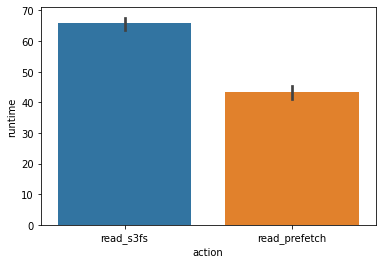

In [5]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_9f_5r_33554432b_16j_seq.out")
df_read = df[df["action"].str.contains("read")]
df_read["rep"] = df_read.index.values

df_read["rep"] = df_read["rep"].apply( lambda v:
    0 if 0 <= v <= 10 
    else 1 if 12 <= v <= 22
    else 2 if 24 <= v <= 34
    else 3 if 36 <= v <= 46
    else 4
) 
df_read.loc[df["action"].str.contains("s3fs"), ["rep","runtime"]] = df_read.loc[df["action"].str.contains("s3fs"), ["rep","runtime"]].groupby("rep").sum()
ax = sns.barplot(x="action", y="runtime", data=df_read)

## Full segmentation benchmarks

- Each file here is a shard of hydi_track_10_58_0.trk (split into 10 shards). 72.7-165.3MB in size.
- Block size is 32MB
- 5 repetitions

#### 1 file sequential

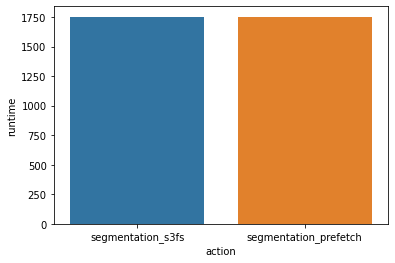

In [6]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_1f_5r_33554432b.out")
df_seg = df[df["action"].str.contains("seg")]
ax = sns.barplot(x="action", y="runtime", data=df_seg)

#### 1 file 16 joblib threads

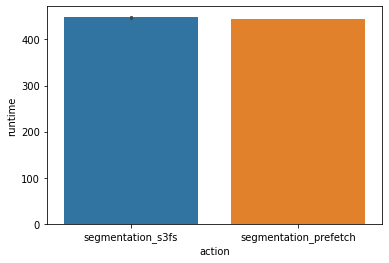

In [7]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_1f_5r_33554432b_16j_seq.out")
df_seg = df[df["action"].str.contains("seg")]
ax = sns.barplot(x="action", y="runtime", data=df_seg)

#### 9 files sequential

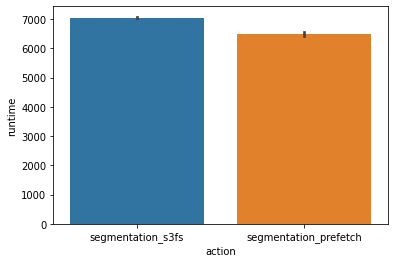

In [8]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_9f_5r_33554432b.out")
df_seg = df[df["action"].str.contains("seg")]
ax = sns.barplot(x="action", y="runtime", data=df_seg)

#### 9 files 16 joblib threads

/home/valeriehayot/Documents/code/ariel_internship/rollingprefetch/.venv/lib64/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


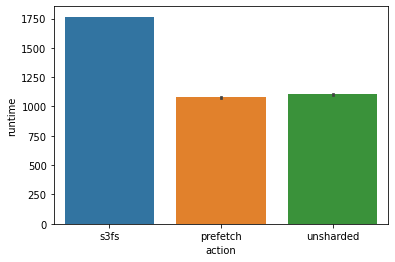

In [9]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_9f_5r_33554432b_16j_seq.out")
df_seg = df[df["action"].str.contains("seg")]
df_seg.loc[df_seg["action"].str.contains("s3fs"), "action"] = "s3fs"
df_seg.loc[df_seg["action"].str.contains("prefetch"), "action"] = "prefetch"

df_orig = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_orig_waypoint_1f_5r_33554432b_16j_seq.out")
df_orig = df_orig[df_orig["action"].str.contains("seg")]
df_orig["action"] = "unsharded"

df = pd.concat([df_seg, df_orig])
ax = sns.barplot(x="action", y="runtime", data=df)

#### Larger shards (original tract files)

#### Read

<ipython-input-10-fb1d1081b4cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read["rep"] = df_read.index.values
<ipython-input-10-fb1d1081b4cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read["rep"] = df_read["rep"].apply( lambda v:
/home/valeriehayot/Documents/code/ariel_internship/rollingprefetch/.venv/lib64/python3.9/site-packages/pandas/core/indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

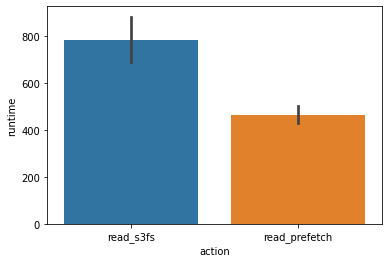

In [10]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_orig_waypoint_10f_5r_33554432b_16j_seq.out")
df_read = df[df["action"].str.contains("read")]
df_read["rep"] = df_read.index.values

df_read["rep"] = df_read["rep"].apply( lambda v:
    0 if 0 <= v <= 10 
    else 1 if 12 <= v <= 22
    else 2 if 24 <= v <= 34
    else 3 if 36 <= v <= 46
    else 4
) 
df_read.loc[df["action"].str.contains("s3fs"), ["rep","runtime"]] = df_read.loc[df["action"].str.contains("s3fs"), ["rep","runtime"]].groupby("rep").sum()
ax = sns.barplot(x="action", y="runtime", data=df_read)

### Segmentation

In [11]:
df_c = pd.read_csv("../results/us-west-2-c5.9/real_1f_5r_67108864b.out")
df_c["instance"] = "c5.9xLarge"
df_c.loc[df_c["action"].str.contains("s3fs"), "action"] = "s3fs"
df_c.loc[df_c["action"].str.contains("prefetch"), "action"] = "RP"
speedup_c = df_c.loc[df_c["action"] == "s3fs", "runtime"].mean() / df_c.loc[df_c["action"] == "RP", "runtime"].mean()
speedup_c
df_c

,action,file,timestamp,runtime,lazy,blocksize,prefetch_storage,instance
0,RP,"['vhs-bucket/hydi-header.trk', 'hydi-tractogra...",6580670716751,831.098760,False,67108864,"(('/dev/shm', 2048),)",c5.9xLarge
1,s3fs,['hydi-tractography/hydi_tracks.10_58_0.trk'],7412574946743,1362.101708,False,67108864,[],c5.9xLarge
2,RP,"['vhs-bucket/hydi-header.trk', 'hydi-tractogra...",8775342088855,873.520163,False,67108864,"(('/dev/shm', 2048),)",c5.9xLarge
3,s3fs,['hydi-tractography/hydi_tracks.10_58_0.trk'],9649495097332,1347.846516,False,67108864,[],c5.9xLarge
4,s3fs,['hydi-tractography/hydi_tracks.10_58_0.trk'],10998048774556,1356.611338,False,67108864,[],c5.9xLarge
5,RP,"['vhs-bucket/hydi-header.trk', 'hydi-tractogra...",12355346559410,850.377738,False,67108864,"(('/dev/shm', 2048),)",c5.9xLarge
6,s3fs,['hydi-tractography/hydi_tracks.10_58_0.trk'],13206388878012,1341.830281,False,67108864,[],c5.9xLarge
7,RP,"['vhs-bucket/hydi-header.trk', 'hydi-tractogra...",14548919773606,844.331145,False,67108864,"(('/dev/shm', 2048),)",c5.9xLarge
8,RP,"['vhs-bucket/hydi-header.trk', 'hydi-tractogra...",15393879814937,837.871696,False,67108864,"(('/dev/shm', 2048),)",c5.9xLarge
9,s3fs,['hydi-tractography/hydi_tracks.10_58_0.trk'],16232460286236,1352.810578,False,67108864,[],c5.9xLarge


<ipython-input-12-c4df0ea8eca3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg["instance"] = "R5.4xLarge"
/home/valeriehayot/Documents/code/ariel_internship/rollingprefetch/.venv/lib64/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


1.14148707206663

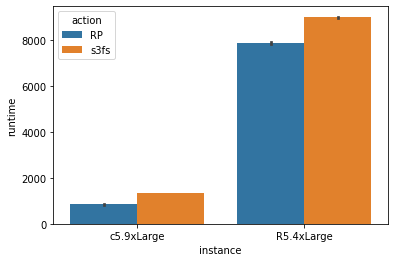

In [12]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_orig_waypoint_10f_5r_33554432b_16j_seq.out")
df_seg = df[df["action"].str.contains("seg")]
df_seg["instance"] = "R5.4xLarge"
df_seg.loc[df_seg["action"].str.contains("s3fs"), "action"] = "s3fs"
df_seg.loc[df_seg["action"].str.contains("prefetch"), "action"] = "RP"
speedup_r = df_seg.loc[df_seg["action"] == "s3fs", "runtime"].mean() / df_seg.loc[df_seg["action"] == "RP", "runtime"].mean()

df_all = pd.concat([df_c, df_seg])
ax = sns.barplot(x="instance", y="runtime", hue="action", data=df_all)
speedup_r

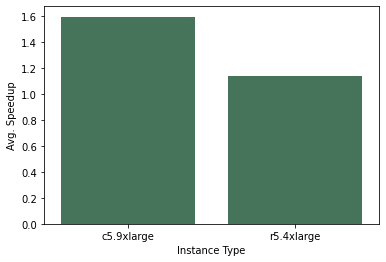

In [13]:
ax = sns.barplot(x=["c5.9xlarge", "r5.4xlarge"], y=[speedup_c, speedup_r], color="seagreen", saturation=0.5)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax.set_ylabel("Avg. Speedup")
ax.set_xlabel("Instance Type")
plt.savefig("speedup.pdf")

## 15 files
### Read

<ipython-input-14-a3fceeae4a49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read["rep"] = 0
/home/valeriehayot/Documents/code/ariel_internship/rollingprefetch/.venv/lib64/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/valeriehayot/Documents/code/ariel_internship/rollingprefetch/.venv/lib64/python3.9/site-packages/pandas/core/indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on 

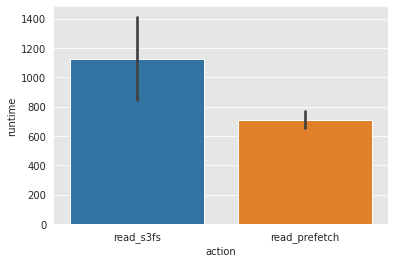

In [14]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_orig_waypoint_15f_5r_33554432b_16j_seq.out")
df_read = df[df["action"].str.contains("read")]

df_read["rep"] = 0
df_read.loc[df_read.iloc[18:34].index.values,"rep"] = 1
df_read.loc[df_read.iloc[36:52].index.values,"rep"] = 2
df_read.loc[df_read.iloc[54:70].index.values,"rep"] = 3
df_read.loc[df_read.iloc[72:88].index.values,"rep"] = 4
df_read.loc[df["action"].str.contains("s3fs"), ["rep","runtime"]] = df_read.loc[df["action"].str.contains("s3fs"), ["rep","runtime"]].groupby("rep").sum()
ax = sns.barplot(x="action", y="runtime", data=df_read)

### Segmentation

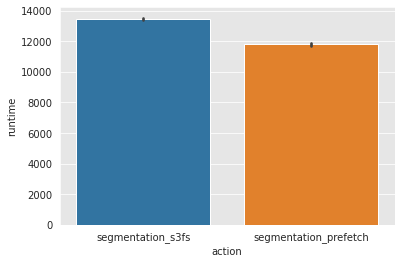

In [15]:
df_seg = df[df["action"].str.contains("seg")]
ax = sns.barplot(x="action", y="runtime", data=df_seg)

### Histogram

#### 15 files 20bins not lazy

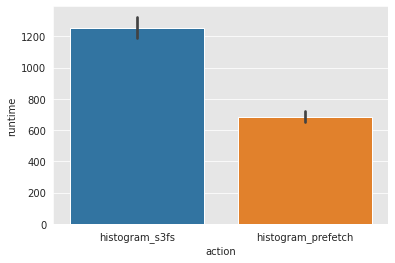

In [16]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/histogram_orig_15f_5r_33554432b_20bins_seq.out")
ax = sns.barplot(x="action", y="runtime", data=df)
plt.savefig("histo_15_20bins_notlazy.pdf")

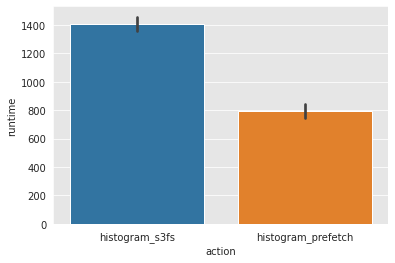

In [17]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/histogram_orig_45f_5r_33554432b_20bins_3dask_lazy.out")
df["rep"] = 0
df.loc[df.iloc[6:12].index.values,"rep"] = 1
df.loc[df.iloc[12:18].index.values,"rep"] = 2
df.loc[df.iloc[18:24].index.values,"rep"] = 3
df.loc[df.iloc[24:30].index.values,"rep"] = 4
df[["action", "runtime", "rep"]].groupby(by=["action", "rep"]).max()
ax = sns.barplot(x="action", y="runtime", data=df)
plt.savefig("histo_15_20bins_lazy_3workers_dask.pdf")

0    84.603669
1    34.796887
2    51.460765
3    34.515604
4    45.482203
5    34.501269
6    43.104903
7    34.218857
8    42.350031
9    34.291142
Name: runtime, dtype: float64

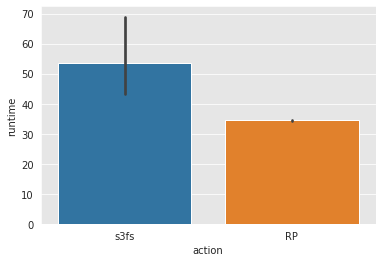

In [18]:
df_hist = pd.read_csv("../results/us-west-2-R5.4xlarge/us-west-2-R5.4xlarge/histogram_orig_1f_5r_33554432b_20bins_seq_lazy.out")
df_hist.loc[df_hist["action"].str.contains("s3fs"), "action"] = "s3fs"
df_hist.loc[df_hist["action"].str.contains("prefetch"), "action"] = "RP"
df_hist["pipeline"] = "histogram"
ax = sns.barplot(x="action", y="runtime", data=df_hist)
df_hist["runtime"]
#plt.savefig("histo_15_20bins_notlazy.pdf")

<ipython-input-24-fdf0c5506c37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg["pipeline"] = "segmentation"
<ipython-input-24-fdf0c5506c37>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read["rep"] = 0
<ipython-input-24-fdf0c5506c37>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

(runtime    1302.970134
 dtype: float64,
 8987.870753969,
 0.14285714285714285)

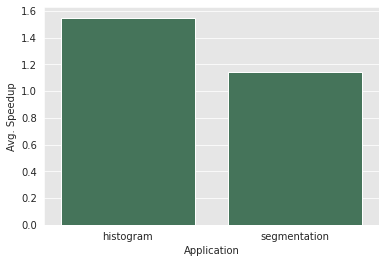

In [24]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_orig_waypoint_10f_5r_33554432b_16j_seq.out")
df_seg = df[df["action"].str.contains("seg")]
df_seg.loc[df_seg["action"].str.contains("s3fs"), "action"] = "s3fs"
df_seg.loc[df_seg["action"].str.contains("prefetch"), "action"] = "RP"
df_seg["pipeline"] = "segmentation"

df_read = df.loc[df["action"].str.contains("read")]
df_read["rep"] = 0
df_read.loc[df_read.iloc[18:34].index.values,"rep"] = 1
df_read.loc[df_read.iloc[36:52].index.values,"rep"] = 2
df_read.loc[df_read.iloc[54:70].index.values,"rep"] = 3
df_read.loc[df_read.iloc[72:88].index.values,"rep"] = 4
avg_read_pf = df_read.loc[df_read["action"].str.contains("prefetch"), "runtime"].mean()
avg_read_s3fs = df_read.loc[df_read["action"].str.contains("s3fs"), ["runtime", "rep"]].groupby(by=["rep"]).sum()

df_hist.loc[df_hist["action"].str.contains("s3fs"), "compute time (s)"] = df_hist.loc[df_hist["action"].str.contains("s3fs"), "runtime"] - avg_read_s3fs
df_hist.loc[df_hist["action"].str.contains("RP"), "compute time (s)"] = df_hist.loc[df_hist["action"].str.contains("RP"), "runtime"] - avg_read_pf

df_seg["compute time (s)"] = df_seg["runtime"] - avg_read_pf

speedup_hist = df_hist.loc[df_hist["action"] == "s3fs", "runtime"].mean() / df_hist.loc[df_hist["action"] == "RP", "runtime"].mean()
speedup_seg = df_seg.loc[df_seg["action"] == "s3fs", "runtime"].mean() / df_seg.loc[df_seg["action"] == "RP", "runtime"].mean()


df_all = pd.concat([df_hist, df_seg])
ax = sns.barplot(x=["histogram", "segmentation"], y=[speedup_hist, speedup_seg], color="seagreen", saturation=0.5)
df_hist[["runtime","compute time (s)"]]
ax.set_ylabel("Avg. Speedup")
ax.set_xlabel("Application")
plt.savefig("speedup_application.pdf")
avg_read_s3fs.mean(), df_seg.loc[df_seg["action"] == "s3fs", "runtime"].mean(), 1/7

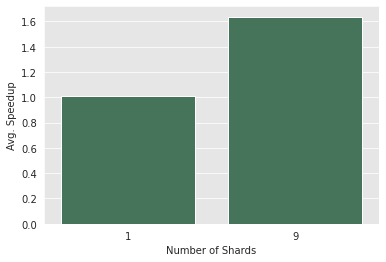

In [25]:
df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_1f_5r_33554432b_16j_seq.out")
df["shards"] = 1
df_seg1 = df[df["action"].str.contains("seg")]


df = pd.read_csv("../results/us-west-2-R5.4xlarge/segmentation_shards_waypoint_9f_5r_33554432b_16j_seq.out")
df["shards"] = 9
df_seg9 = df[df["action"].str.contains("seg")]

df = pd.concat([df_seg1, df_seg9])

speedup_1 = df_seg1.loc[df_seg1["action"].str.contains("s3fs"), "runtime"].mean() / df_seg1.loc[df_seg1["action"].str.contains("prefetch"), "runtime"].mean()
speedup_9 = df_seg9.loc[df_seg9["action"].str.contains("s3fs"), "runtime"].mean() / df_seg9.loc[df_seg9["action"].str.contains("prefetch"), "runtime"].mean()

ax = sns.barplot(x=[1, 9], y=[speedup_1, speedup_9], color="seagreen", saturation=0.5)
ax.set_ylabel("Avg. Speedup")
ax.set_xlabel("Number of Shards")
plt.savefig("speedup_shards.pdf")

[1.5956766767416017,
 1.14148707206663,
 1.007439206037559,
 1.6370406220735605,
 1.549418214526996,
 1.14148707206663]

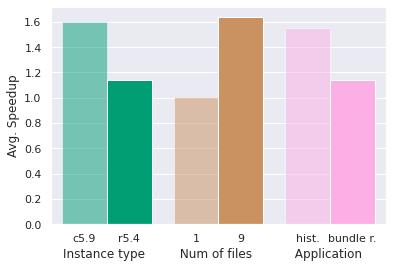

In [28]:
import matplotlib.patches as mpatches
x=["Instance type", "Instance type", "Number of shards", "Number of shards", "Application", "Application"]
y = [speedup_c, speedup_r, speedup_1, speedup_9, speedup_hist, speedup_seg]
hue = [1,2,1,2,1,2]
labels = ["c5.9", "r5.4", "1", "9", "hist.", "bundle r."]
#sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.set_theme()
#sns.set_style("whitegrid", {"axes.facecolor": "1"} )
palette = sns.color_palette("colorblind")
#fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(
    x=x,
    y=y,
    hue=hue,
    palette=palette
)
handles = []
palette = [palette[2]] + [palette[5]] + [palette[6]]
for i, bar in enumerate(ax.patches):
    if i in [0, 1, 2]:
        bar.set_alpha(0.5)
        handles.append(mpatches.Patch(color=palette[(i%3)], alpha=0.5))
    bar.set_facecolor(palette[(i%3)])
    handles.append(mpatches.Patch(color=palette[(i%3)]))
ax.set_ylabel("Avg. Speedup")
ax.set_xticks([-0.2, 0.2, 0.8, 1.2, 1.8, 2.2])
ax.set_xticklabels(labels)
#plt.xticks(rotation=45)
ax.get_legend().remove()

ax.set_xlabel("Instance type         Num of files           Application   ")
#tmp =plt.legend( handles=handles, labels=labels, loc="lower left", bbox_to_anchor=(0, -0.2), borderaxespad=0, ncol=len(labels), )
plt.savefig("speedup.pdf", bbox_inches='tight')
#ax.legend()
y